# Modeling and Prediction
--- 

## Import Relevant Libraries:

In [1]:
#libraries 
import scipy.stats as stats
import numpy as np
import pandas as pd
# from sklearn.model_selection import 
# visual
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score

%matplotlib inline

## Import Data:

In [2]:
train_url = '../project_2/datasets/noutlier_clean_train.csv'

df_train = pd.read_csv(train_url)

# Preprocessing and Modeling
---


## Create feature matrix (X) and target vector (y)  
---  
Lets try using every numeric columns that is not our target vector as a feature

Remember that our target is to get a saleprice

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Columns: 230 entries, Unnamed: 0 to wd__sltp
dtypes: float64(11), int64(219)
memory usage: 3.5 MB


In [4]:
# features = ['overall_qual','exter_qual', 'gr_liv_area', 'garage_overall']
features = [col for col in df_train._get_numeric_data().columns if col !='saleprice']
# This selects features in the columns that are NOT saleprice and likely inaccurate

X = df_train[features]
y = df_train['saleprice']

## Train/test split

Train test and split the data to split our data into a training set and a holdout set for us to verify the model's accuracy.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

## Scaling  
---  
We may potentially use Lasso and Ridge regression models, thus we will scale them to run our tests.

In [6]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Instantiate our models
--- 
Let's instantiate our regression models.

In [7]:
lr = LinearRegression()

In [8]:
lasso = LassoCV(n_alphas = 400)

In [9]:
ridge = RidgeCV(alphas=np.linspace(.1,10,150))

## Cross Validation  
Cross validate all our model scores with our train data and test data

In [10]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

-1.0515135755501696e+25

In [11]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

0.8430857585786381

In [12]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.8181403740811352

In [13]:
cross_val_score(lr, X_test, y_test, cv=5).mean()

-9.282651799372836e+22

In [14]:
cross_val_score(lasso, X_test, y_test, cv=5).mean()

0.8709390991203598

In [15]:
cross_val_score(ridge, X_test, y_test, cv=5).mean()

0.8478434133512959

Looking at our cross validation score, it appears our Lasso model has the best score for both train and test data. Thus I will use the Lasso model.

# Making Predictions
---
Lets start making predictions with our model to test the accuracy and precision.

In [16]:
lasso.fit(X_train, y_train) # Fit the data into the lasso model
predictions = lasso.predict(X_train) # Make a prediction on the train data
prediction_test = lasso.predict(X_test) # Make a prediction on the test data
y_train[:5], predictions[:5]

(188     152000
 1301    145900
 1219    287000
 751     136300
 702     128000
 Name: saleprice, dtype: int64,
 array([160483.09680323, 167360.91488612, 305092.03599285, 144289.37849758,
        126213.89081048]))

### Saving Predictions to a file.

In [17]:
df_pred_train = pd.DataFrame()
df_pred_test = pd.DataFrame()
# Create empty dataframes to house our train and test prediction datas

df_pred_train['saleprice'] = predictions
df_pred_test['saleprice'] = prediction_test
# Create a column with the correct name to add our array of predictions into

df_pred_train.to_csv('datasets/train_predictions.csv')
df_pred_test.to_csv('datasets/test_predictions.csv')
# Output our predictions to our datasets file

## Find our Train Data Metrics
---  
Let's find our metrics for our train data:

In [18]:
np.sqrt(metrics.mean_squared_error(y_train, predictions)) # Find the RMSE of the train data

19602.597923690624

In [19]:
metrics.mean_absolute_error(y_train, predictions) # Find the mean absolute error of the train data

14213.262894665297

In [20]:
metrics.r2_score(y_train, predictions) # Find our R2 score in our train data

0.921324814693764

In [21]:
np.sqrt(metrics.mean_squared_error(y_train, predictions))/y_train.mean()

0.11072704964883712

In [22]:
metrics.mean_absolute_error(y_train, predictions)/y_train.mean()

0.0802849026611712

#### Interpreting our Train Data metrics
A R2 of 0.921 is quite good for our model as it shows a high degree of accuracy in our data relative to the actual data points. We have a RMSE of about 19606, with a mean absolute error of 14217. This indicates that there may be a rather large variance in our model, although it has to be noted that our sale's price is rather high and so a rather large error number is to be expected.   
Relative to our train data's mean sale price, I am of the opinion that our RMSE and MAE numbers are acceptable for this model as the RMSE and MAE error percentage relative to our mean is about 11% and 8%. This also falls in line with the volatility of the property market as well.

## Find our Test Data Metrics
---  
Let's find our metrics for our test data:

In [23]:
np.sqrt(metrics.mean_squared_error(y_test, prediction_test))

20877.348426348915

In [24]:
metrics.mean_absolute_error(y_test, prediction_test)

15279.248862092008

In [25]:
metrics.r2_score(y_test, prediction_test)

0.8994622252710933

In [26]:
np.sqrt(metrics.mean_squared_error(y_test, prediction_test))/y_test.mean()

0.11958664790646087

In [27]:
metrics.mean_absolute_error(y_test, prediction_test)/y_train.mean()

0.08630622093743766

#### Interpreting our Test Data metrics
This test data metric is good as it indicates to us a relatively high R2 score of about 0.899, meaning there is not too much difference between our train model, and test model, meaning that our model is relatively accurate at predicting the sale price of the house.

Our RMSE and MAE has definitely increased from the test data, which indicates that there are still differences in the models. This is to be expected as our model may be precise to our train data, but not necessarily to the test data. However, it should still be able to maintain a level of precision relative to the test data, which it did as it's value is relatively similar to the train data as well.

Our relative error percentage to our RMSE/mean and MAE/mean is about 12.0% and 8.6%, a slight increase from our train data.

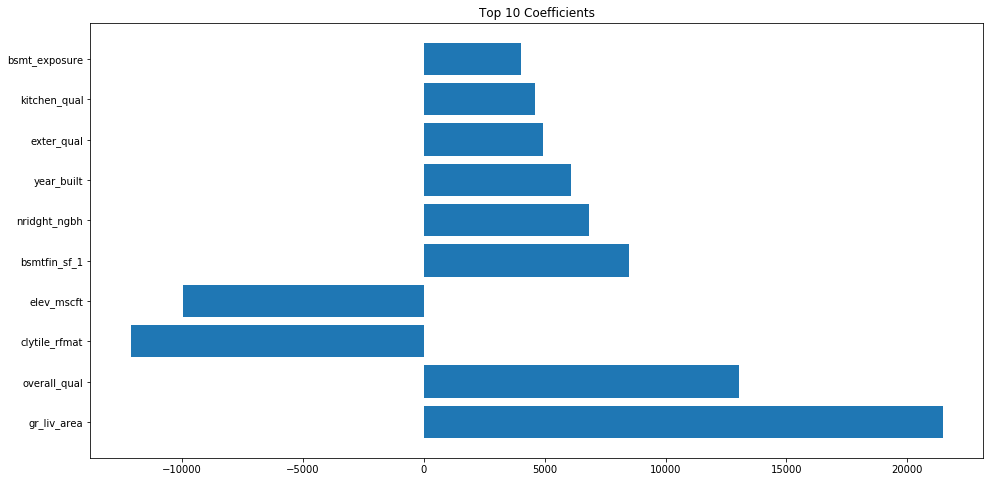

In [28]:
lasso_c = pd.DataFrame()
lasso_c['features'] = pd.Series(features)
lasso_c['lasso_coeff'] = pd.Series(lasso.coef_)
lasso_c['abs_lasso_coeff'] = pd.Series(abs(lasso.coef_))
lasso_c.sort_values('abs_lasso_coeff', ascending= False, inplace = True)
plt.figure(figsize = (16,8))
plt.title('Top 10 Coefficients')
plt.rcParams.update({'font.size': 10})
plt.barh(y = lasso_c['features'].head(10), width = lasso_c['lasso_coeff'].head(10));

In [29]:
print("Number of clay tile roof materials: " + str(np.count_nonzero(df_train['clytile_rfmat'])))
print("Number of Elevator " + str(np.count_nonzero(df_train['elev_mscft'])))
print("Number in North Ridge Neighborhood: " + str(np.count_nonzero(df_train['nridght_ngbh'])))

Number of clay tile roof materials: 1
Number of Elevator 1
Number in North Ridge Neighborhood: 106


It is obvious that clay tile roof materials and elevator features are extremely rare cases in our data. These data should be removed as they are considered outliers if we were to consider the top influencing coefficient. We do note that they contribute a large negative to our price point.

In [30]:
lasso_c.drop(index = 150,axis = 0, inplace  =True)
lasso_c.head(10)

,features,lasso_coeff,abs_lasso_coeff
26,gr_liv_area,21454.734881,21454.734881
5,overall_qual,13033.899776,13033.899776
215,elev_mscft,-9976.677926,9976.677926
16,bsmtfin_sf_1,8470.051539,8470.051539
106,nridght_ngbh,6848.168769,6848.168769
7,year_built,6092.874655,6092.874655
10,exter_qual,4920.253448,4920.253448
33,kitchen_qual,4611.005083,4611.005083
14,bsmt_exposure,4008.646140,4008.646140
105,noridge_ngbh,3702.195162,3702.195162


In [31]:
lasso_c.drop(index = 215,axis = 0, inplace  =True)
lasso_c.head(10)

,features,lasso_coeff,abs_lasso_coeff
26,gr_liv_area,21454.734881,21454.734881
5,overall_qual,13033.899776,13033.899776
16,bsmtfin_sf_1,8470.051539,8470.051539
106,nridght_ngbh,6848.168769,6848.168769
7,year_built,6092.874655,6092.874655
10,exter_qual,4920.253448,4920.253448
33,kitchen_qual,4611.005083,4611.005083
14,bsmt_exposure,4008.646140,4008.646140
105,noridge_ngbh,3702.195162,3702.195162
41,garage_area,3497.652097,3497.652097


Now both outlier data has been removed from our coefficient indices. Replot the graph to see our top 10 highest coefficient indices.

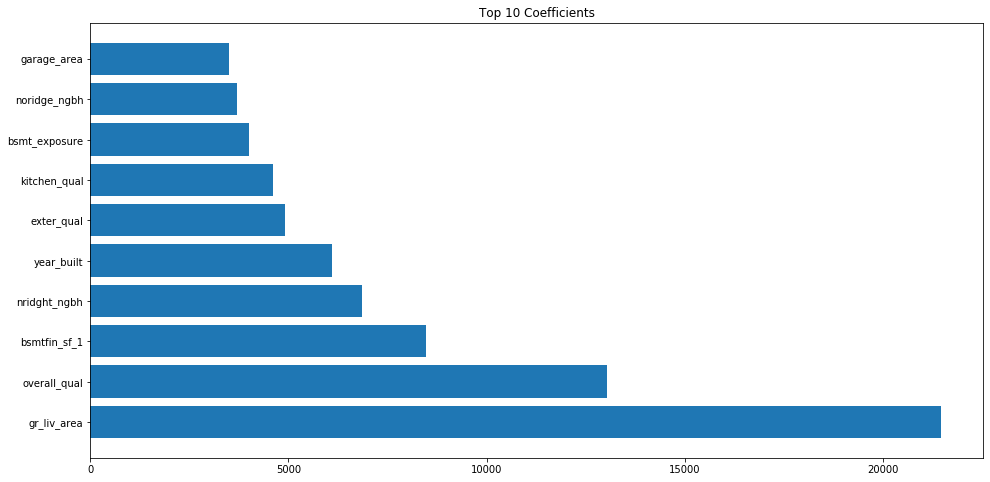

In [32]:
plt.figure(figsize = (16,8))
plt.title('Top 10 Coefficients')
plt.rcParams.update({'font.size': 9})
plt.barh(y = lasso_c['features'].head(10),width = lasso_c['lasso_coeff'].head(10));

Appears our top 10 are the general living area, the overall quality of the house, the basement size, the location of the house within North Ridge and North Ridge Height, the years built, exterior quality, kitchen quality, basement exposure and the garage area.

We can infer that North Ridge is likely an expensive location to stay in given the correlation to the sales price.

Research on this particular relationship seem to confirm my conjecture, as followed by this link:  
https://nycdatascience.com/blog/r/ames-iowa-real-estate-analysis/

Generally speaking a house with large general living area will be more likely to sell at a higher price. Overall quality does have a positive impact on sale price.

The size of basement and garage does have a positive impact on our house as well.

Next, the later the house was built, the likelier it will sell at a higher price.

Being able to see outside from your basement is also likely to raise the price of the house.

Lastly, the exterior of the house matters too.

## Comparing our model to a baseline model
--- 
Our baseline model is based on the mean sale price.

In [33]:
# Create a prediction for the baseline model
y_bar_train = np.mean(y_train)
y_bar_test = np.mean(y_test)

In [34]:
base_rmse_train = np.mean((y_train - y_bar_train)**2)**0.5
round(base_rmse_train,2)

69886.73

In [35]:
base_rmse_test = np.mean((y_test - y_bar_test)**2)**0.5
round(base_rmse_test,2)

65843.17

Wow! That is a very large RMSE for both our test and train data for our baseline model. Our model has a lot lower RMSE compared to our baseline model. This means our model is a lot more precise than the baseline model.

In [36]:
residuals_test = y_test - prediction_test

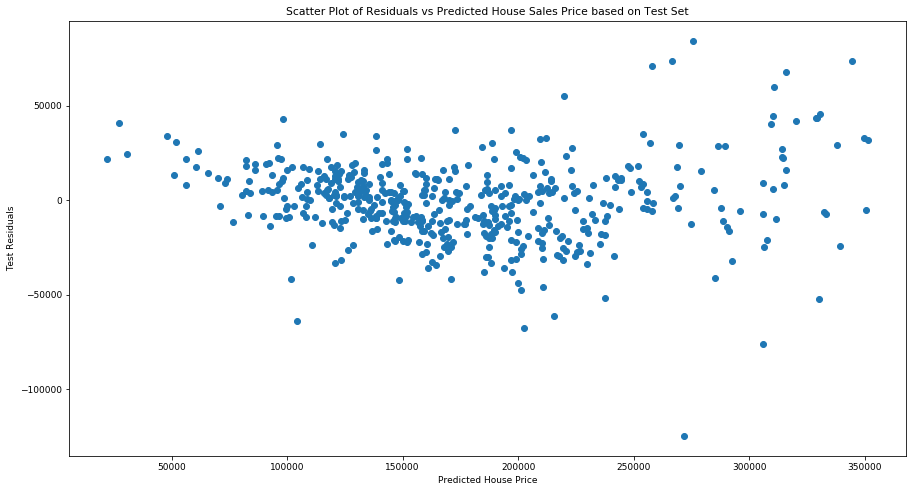

In [37]:
plt.figure(figsize = (15,8))
plt.title('Scatter Plot of Residuals vs Predicted House Sales Price based on Test Set')
plt.rcParams.update({'font.size': 15})
plt.xlabel("Predicted House Price")
plt.ylabel("Test Residuals")
plt.scatter(prediction_test, residuals_test);

In [38]:
residuals_train = y_train - predictions

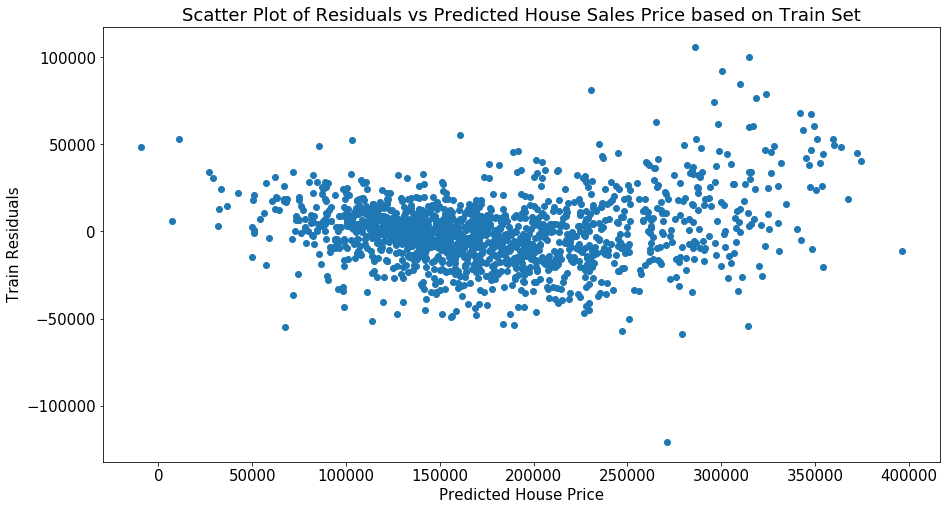

In [39]:
plt.figure(figsize = (15,8))
plt.title('Scatter Plot of Residuals vs Predicted House Sales Price based on Train Set')
plt.rcParams.update({'font.size': 15})
plt.xlabel("Predicted House Price")
plt.ylabel("Train Residuals")
plt.scatter(predictions, residuals_train);

These scatterplots show that our model is quite clustered around the y = 0 line, which means we have a rather good prediction accuracy with our model.

# Conclusion and Recommendations
---
From our data, it is clear that there are several factors that contributes to the sales price of a house in AMES. In particular the following:

General Living Area
Exterior Quality
Overall Quality
Garage Space
Location within Northridge Area

Generally, it is recommended to maximise the house living area, and the invest in landscaping and exterior renovation to maximise the exterior of the house. It is also advisable to have a larger garage and to construct the house with generally good quality materials and furnishings/fixtures. It will also be good to attempt to bid for lots and areas within the Northridge area as they contribute to a higher sale price.

Also, it might be advisable avoid special fixtures like elevators and clay tiles, they may significantly affect the sales price of the house, although it may be rare.